### SWIPECAR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('TrainData.csv')
train_data.head().T

,0,1,2,3,4
ID,1,2,3,4,5
symboling,-1,0,0,0,-2
normalized-losses,65,188,?,161,103
make,toyota,bmw,renault,peugot,volvo
fuel-type,gas,gas,gas,diesel,gas
aspiration,std,std,std,turbo,std
num-of-doors,four,two,four,four,four
body-style,hatchback,sedan,wagon,sedan,sedan
drive-wheels,fwd,rwd,fwd,rwd,rwd
engine-location,front,front,front,front,front


In [3]:
train_data.tail()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
176,177,1,129,mazda,gas,std,two,hatchback,fwd,front,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
177,178,1,113,mazda,gas,std,four,sedan,fwd,front,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395
178,179,1,119,plymouth,gas,std,two,hatchback,fwd,front,...,90,2bbl,2.97,3.23,9.4,68,5500,37,41,5572
179,180,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
180,181,-1,?,toyota,gas,std,four,wagon,rwd,front,...,161,mpfi,3.27,3.35,9.2,156,5200,19,24,15750


In [4]:
test_data = pd.read_csv('TestData.csv')
test_data.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-2,103,volvo,gas,std,four,sedan,rwd,front,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
1,2,0,188,bmw,gas,std,four,sedan,rwd,front,...,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28
2,3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,...,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22
3,4,1,154,plymouth,gas,std,four,sedan,fwd,front,...,four,90,2bbl,2.97,3.23,9.4,68,5500,31,38
4,5,1,103,nissan,gas,std,four,wagon,fwd,front,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37


In [5]:
test_data.tail()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
15,16,0,?,bmw,gas,std,four,sedan,rwd,front,...,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22
16,17,1,168,toyota,gas,std,two,hatchback,rwd,front,...,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29
17,18,0,?,peugot,gas,std,four,wagon,rwd,front,...,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24
18,19,2,192,bmw,gas,std,two,sedan,rwd,front,...,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29
19,20,0,91,toyota,diesel,std,four,sedan,fwd,front,...,four,110,idi,3.27,3.35,22.5,56,4500,34,36


### Dataset statistics

### Variable type

### Variable Information

### Info of the Data

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [7]:
train_data.describe()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,91.000000,0.850829,98.729282,174.174033,65.943646,53.709945,2564.165746,127.900552,10.154254,25.132597,30.646409,13271.314917
std,52.394338,1.267045,6.116197,12.336569,2.146114,2.497735,523.489016,42.578438,3.982306,6.418211,6.888545,8106.479635
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,46.000000,0.000000,94.500000,166.800000,64.200000,51.600000,2190.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,91.000000,1.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,136.000000,2.000000,102.400000,183.100000,66.600000,55.500000,2935.000000,146.000000,9.400000,30.000000,34.000000,16500.000000
max,181.000000,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


### Data-Preprocessing

In [8]:
train_data1 = train_data.copy()

In [9]:
train_data1.columns

Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

### Finding '?' and replacing with NaN

In [10]:
Columns = ['normalized-losses','bore','stroke','horsepower','peak-rpm']

In [11]:
for i in Columns:
    train_data1[i]=train_data1[i].str.replace('?','NaN').astype('float')

In [12]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  147 non-null    float64
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [13]:
train_data1[Columns].describe()

,normalized-losses,bore,stroke,horsepower,peak-rpm
count,147.000000,177.000000,177.000000,179.000000,179.000000
mean,120.863946,3.338983,3.274463,104.167598,5106.703911
std,35.086515,0.265255,0.309848,37.967385,473.256441
min,65.000000,2.680000,2.190000,48.000000,4150.000000
25%,94.000000,3.150000,3.110000,71.000000,4800.000000
50%,115.000000,3.330000,3.350000,95.000000,5100.000000
75%,148.000000,3.590000,3.460000,116.000000,5500.000000
max,256.000000,3.940000,4.170000,262.000000,6600.000000


### Replacing the NaN values with Mean Values since data seems to be normally distributed except for Horsepower

In [14]:
train_data1['normalized-losses'].fillna(train_data1['normalized-losses'].mean(), inplace=True)

In [15]:
train_data1['bore'].fillna(train_data1['bore'].mean(), inplace=True)

In [16]:
train_data1['stroke'].fillna(train_data1['stroke'].mean(), inplace=True)

In [17]:
train_data1['horsepower'].fillna(train_data1['horsepower'].median(), inplace=True)

In [18]:
train_data1['peak-rpm'].fillna(train_data1['peak-rpm'].mean(), inplace=True)

In [19]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    float64
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

### Categorical Variable Change - num-of doors

In [20]:
train_data1['num-of-doors'] = train_data1['num-of-doors'].str.replace('?','four')

In [21]:
train_data1['num-of-doors'].value_counts()

four    104
two      77
Name: num-of-doors, dtype: int64

In [22]:
train_data1['drive-wheels'].value_counts()

fwd    108
rwd     65
4wd      8
Name: drive-wheels, dtype: int64

In [23]:
train_data1['drive-wheels'] = train_data1['drive-wheels'].str.replace('4wd','fwd')

In [24]:
train_data1['drive-wheels'].value_counts()

fwd    116
rwd     65
Name: drive-wheels, dtype: int64

In [25]:
NumCols = train_data1.describe().columns

In [26]:
CatCols = set(train_data1.columns)-set(train_data1.describe().columns)

In [27]:
CatCols

{'aspiration',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system',
 'fuel-type',
 'make',
 'num-of-cylinders',
 'num-of-doors'}

### Exploratory Data Analysis

### Univariate Analysis

### Price : Target Variable

In [28]:
print(train_data["price"].describe())

count      181.000000
mean     13271.314917
std       8106.479635
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64


<AxesSubplot:xlabel='price', ylabel='Density'>

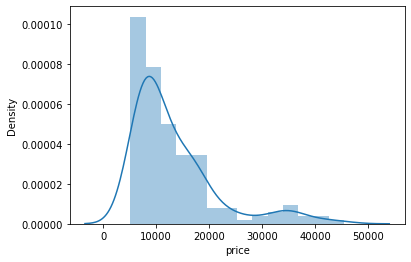

In [29]:
sns.distplot(train_data['price'])

#### Inference

### Car ID

### Symboling

#### Lets Check the count of automobile in each category and percent share of each category.

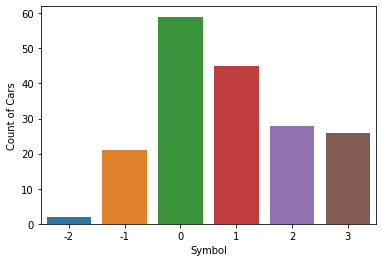

<Figure size 432x288 with 0 Axes>

In [30]:
plt1 = sns.countplot(train_data['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

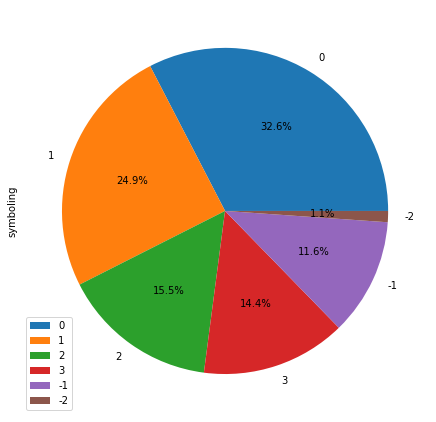

<Figure size 432x288 with 0 Axes>

In [31]:
df_sym = pd.DataFrame(train_data['symboling'].value_counts())
df_sym.plot.pie(subplots=True,labels = df_sym.index.values, autopct='%1.1f%%', figsize = (15,7.5))
# Unsquish the pie.
plt.gca().set_aspect('equal')
plt.show()
plt.tight_layout()

#### Lets Check average price of cars in each symbol category

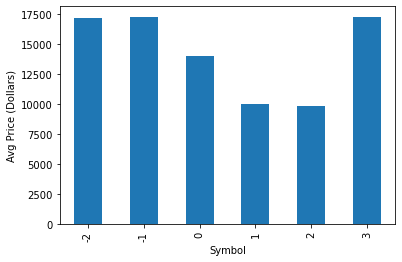

In [32]:
plt1 = train_data[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
plt.show()

#### Inference

### Normalized-Losses

<AxesSubplot:xlabel='normalized-losses', ylabel='Density'>

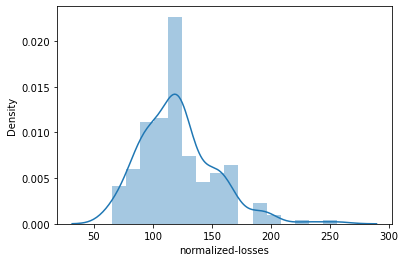

In [33]:
sns.distplot(train_data1['normalized-losses'])

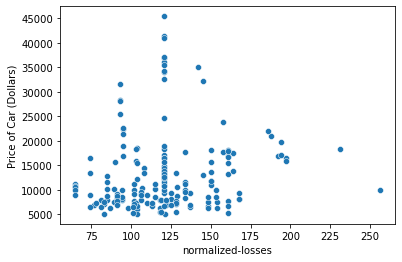

In [34]:
plt1 = sns.scatterplot(x = 'normalized-losses', y = 'price', data = train_data1)
plt1.set_xlabel('normalized-losses')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Inference

### Make

In [35]:
train_data.make.values[0:10]

array(['toyota', 'bmw', 'renault', 'peugot', 'volvo', 'dodge', 'jaguar',
       'porsche', 'subaru', 'mitsubishi'], dtype=object)

#### Check companies and their no of models.

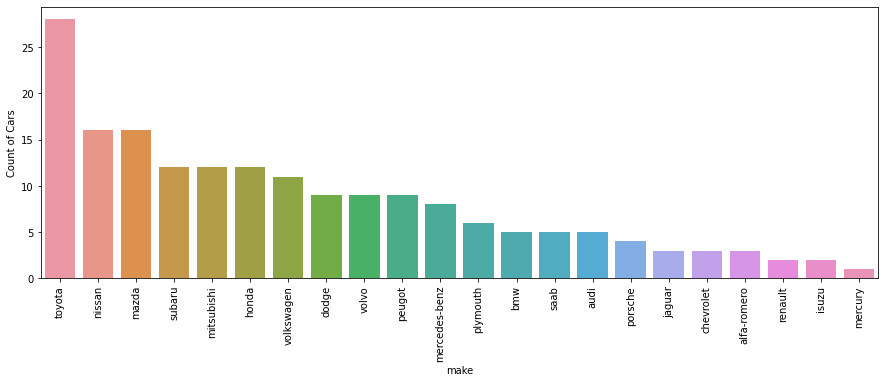

<Figure size 432x288 with 0 Axes>

In [36]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(train_data['make'], order=pd.value_counts(train_data['make']).index,)
plt1.set(xlabel = 'make', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [37]:
train_data.make.describe()

count        181
unique        22
top       toyota
freq          28
Name: make, dtype: object

#### Inference

#### Lets Check average car price of each company.

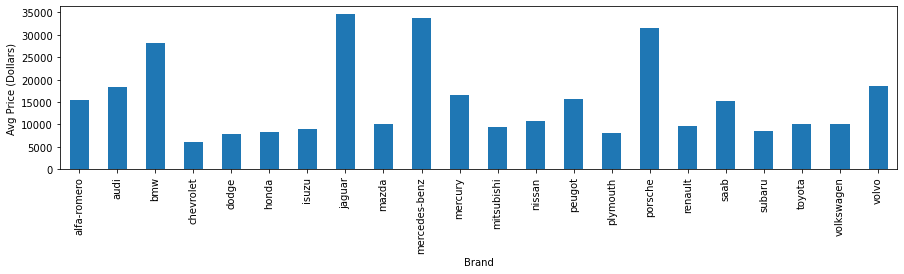

In [38]:
train_comp_avg_price = train_data[['make','price']].groupby("make", as_index = False).mean().rename(columns={'price':'make_avg_price'})
plt1 = train_comp_avg_price.plot(x = 'make', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

#### Inference

### Aspiration

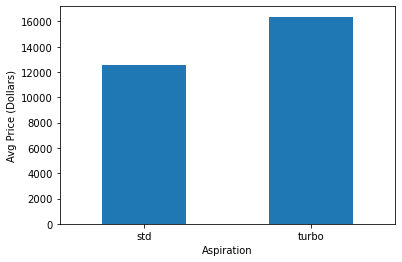

In [39]:
train_aspir_avg_price = train_data[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = train_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Inference

### Door Numbers

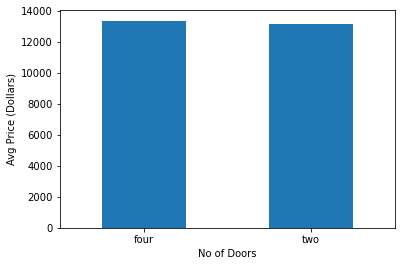

In [40]:
train_door_avg_price = train_data1[['num-of-doors','price']].groupby("num-of-doors", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = train_door_avg_price.plot(x = 'num-of-doors', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Inference

### Body Style

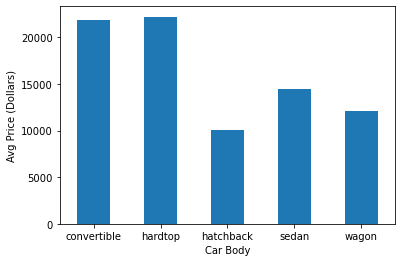

In [41]:
train_body_avg_price = train_data[['body-style','price']].groupby("body-style", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = train_body_avg_price.plot(x = 'body-style', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Inference

### Drive-wheels

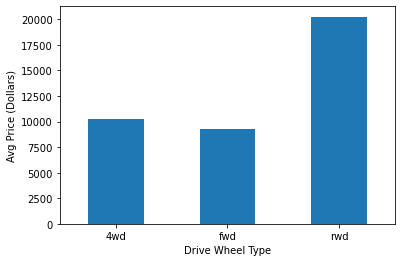

In [42]:
train_drivewheel_avg_price = train_data[['drive-wheels','price']].groupby("drive-wheels", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = train_drivewheel_avg_price.plot(x = 'drive-wheels', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Inference

### Wheel base

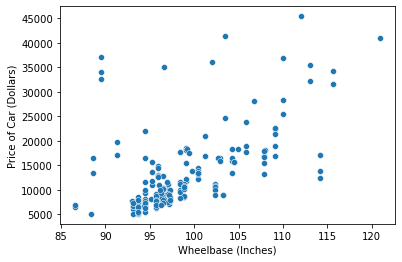

In [43]:
plt1 = sns.scatterplot(x = 'wheel-base', y = 'price', data = train_data)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

#### Inference

### Car Dimensions

#### Lets Check how price varies with Car's length, width,height and weight.

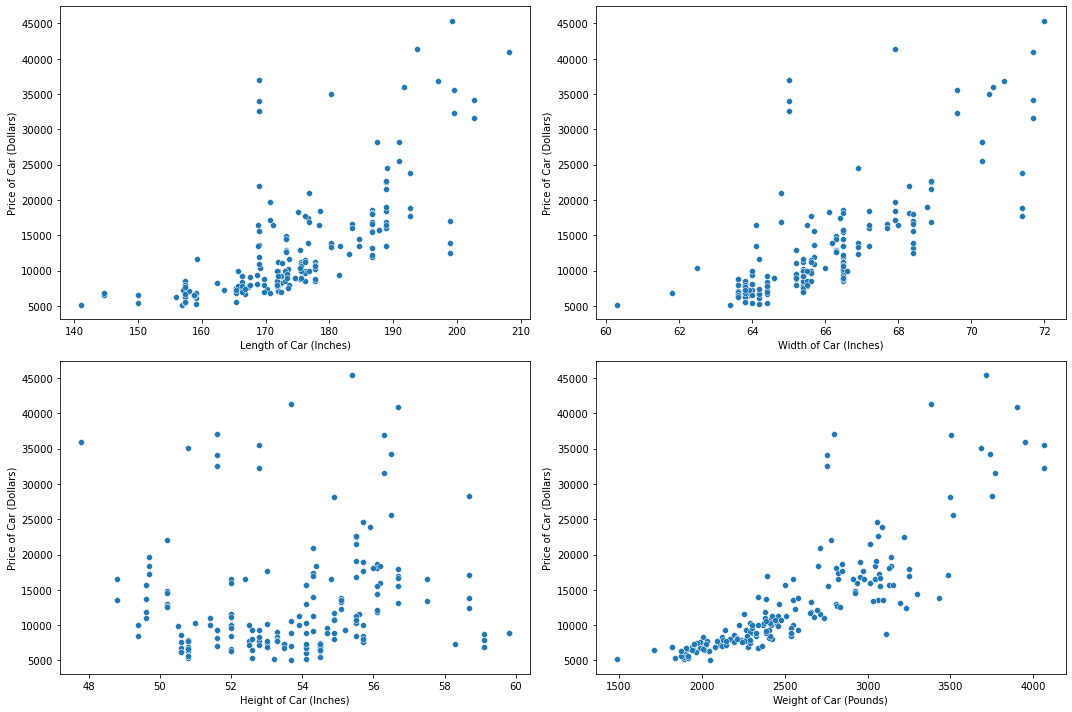

In [44]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'length', y = 'price', data = train_data, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'width', y = 'price', data = train_data, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'height', y = 'price', data = train_data, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curb-weight', y = 'price', data = train_data, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

#### Inference

### Engine Type, No of Cyl & Fuel System

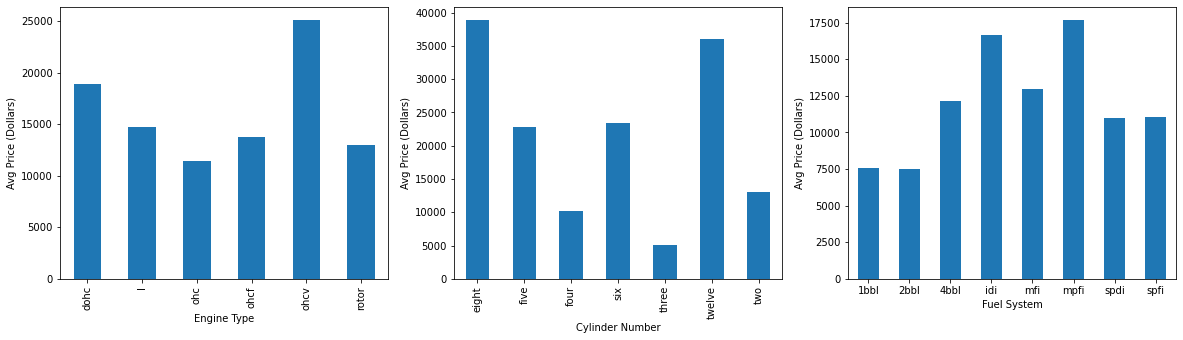

In [45]:
fig, axs = plt.subplots(1,3,figsize=(20,5))
#
train_engine_avg_price = train_data[['engine-type','price']].groupby("engine-type", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = train_engine_avg_price.plot(x = 'engine-type', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
train_cylindernumber_avg_price = train_data[['num-of-cylinders','price']].groupby("num-of-cylinders", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = train_cylindernumber_avg_price.plot(x = 'num-of-cylinders', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
train_fuelsystem_avg_price = train_data[['fuel-system','price']].groupby("fuel-system", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = train_fuelsystem_avg_price.plot(x = 'fuel-system', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

#### Inference

### Engine Size, Bore Ratio, Stroke, Horsepower, Peak RPM & Compression Ratio

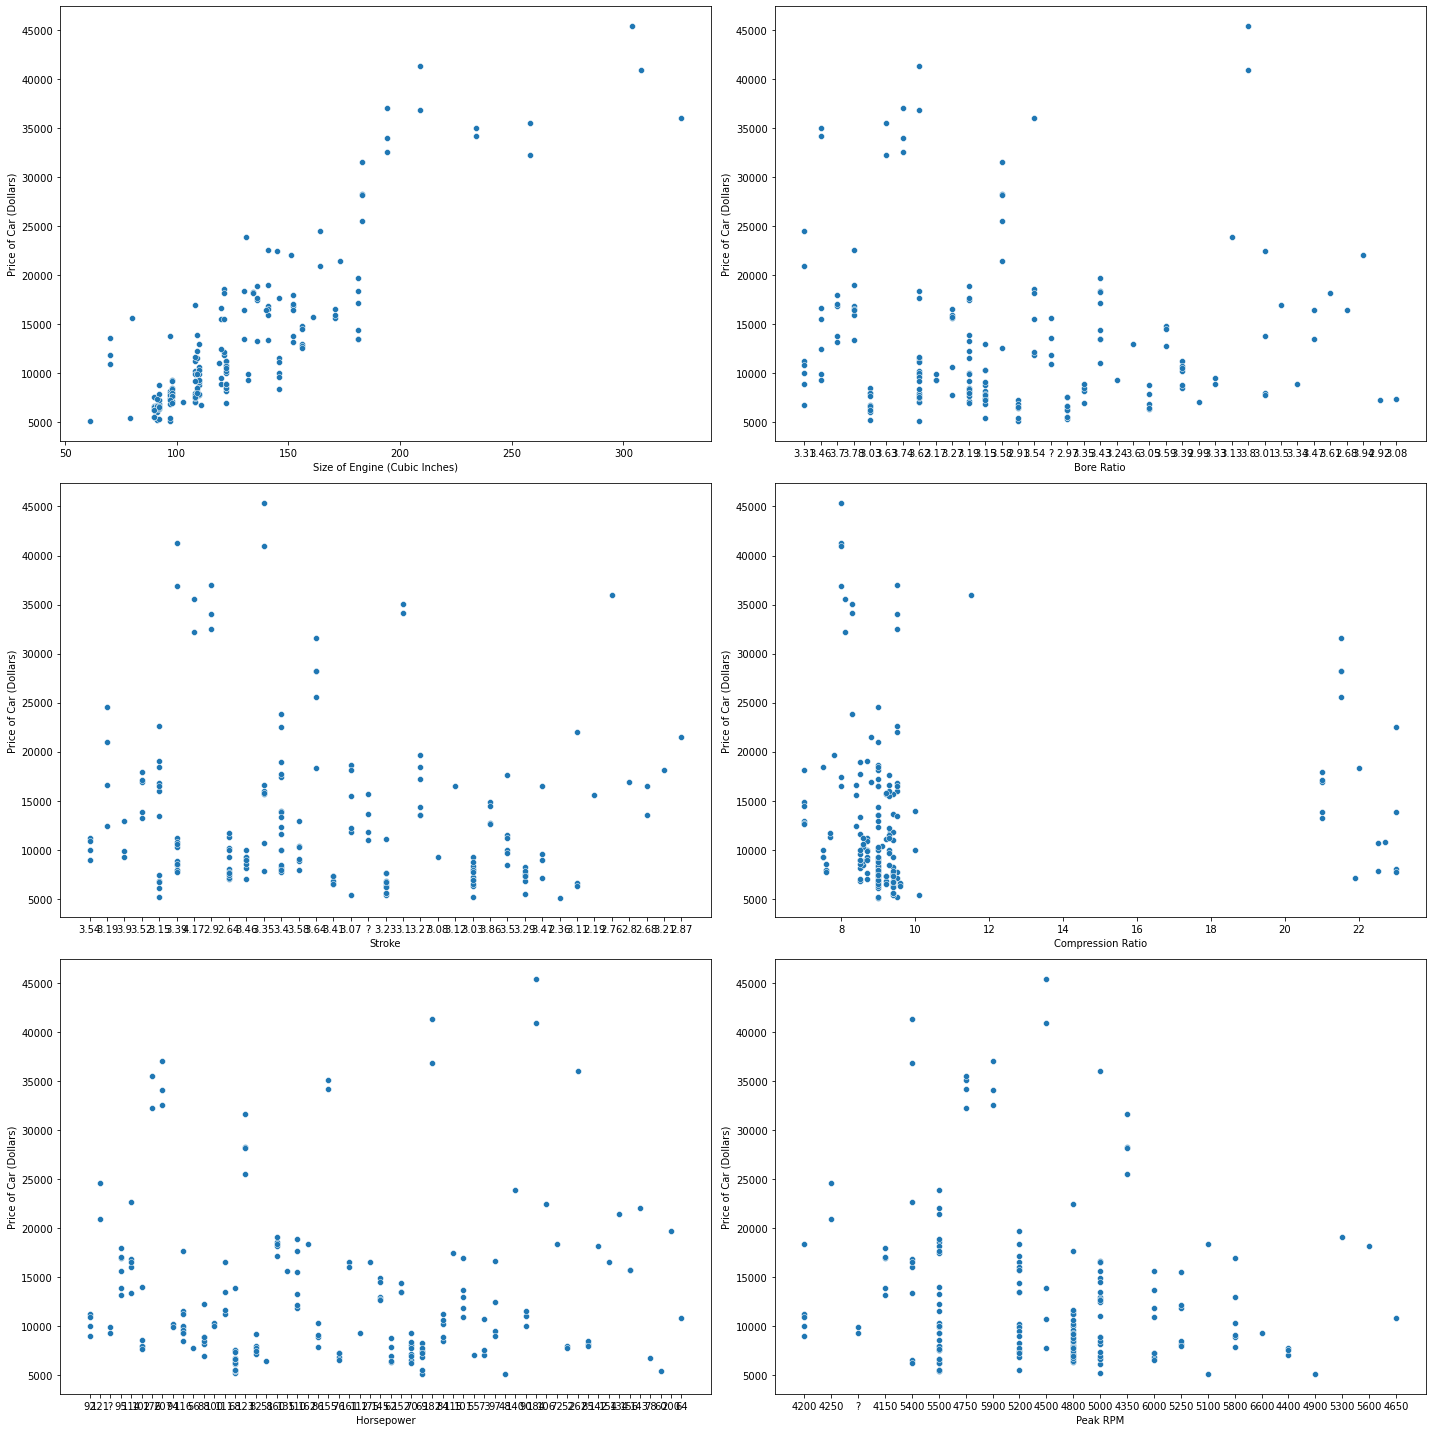

In [46]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'engine-size', y = 'price', data = train_data, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'bore', y = 'price', data = train_data, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = train_data, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compression-ratio', y = 'price', data = train_data, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = train_data, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peak-rpm', y = 'price', data = train_data, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

#### Inference

#### Lets find out what is the split of Categorical Variables in the Dataset

<AxesSubplot:xlabel='body-style', ylabel='count'>

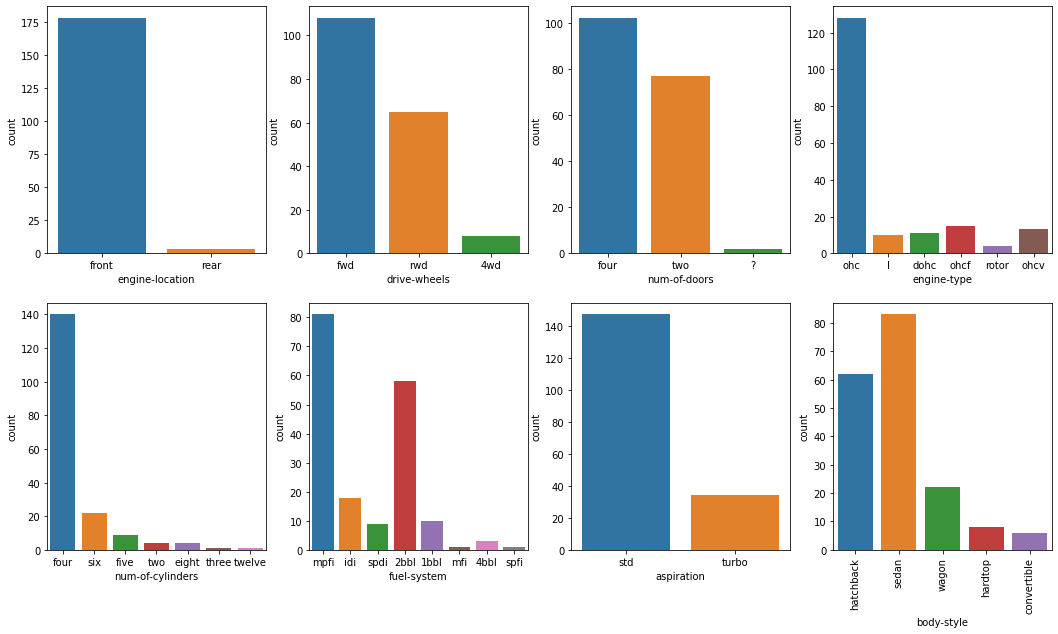

In [47]:
f,axes = plt.subplots(2,4,figsize=(18,10))
plt.xticks(rotation=90)
sns.countplot(x=train_data['engine-location'],ax=axes[0,0])
sns.countplot(x=train_data['drive-wheels'],ax=axes[0,1])
sns.countplot(x=train_data['num-of-doors'],ax=axes[0,2])
sns.countplot(x=train_data['engine-type'],ax=axes[0,3])
plt.xticks(rotation=90)
sns.countplot(x=train_data['num-of-cylinders'],ax=axes[1,0])
plt.xticks(rotation=90)
sns.countplot(x=train_data['fuel-system'],ax=axes[1,1])
sns.countplot(x=train_data['aspiration'],ax=axes[1,2])
sns.countplot(x=train_data['body-style'],ax=axes[1,3])

#### Inference

#### Lets find out Relationship of Categorical Variable with Target Variable

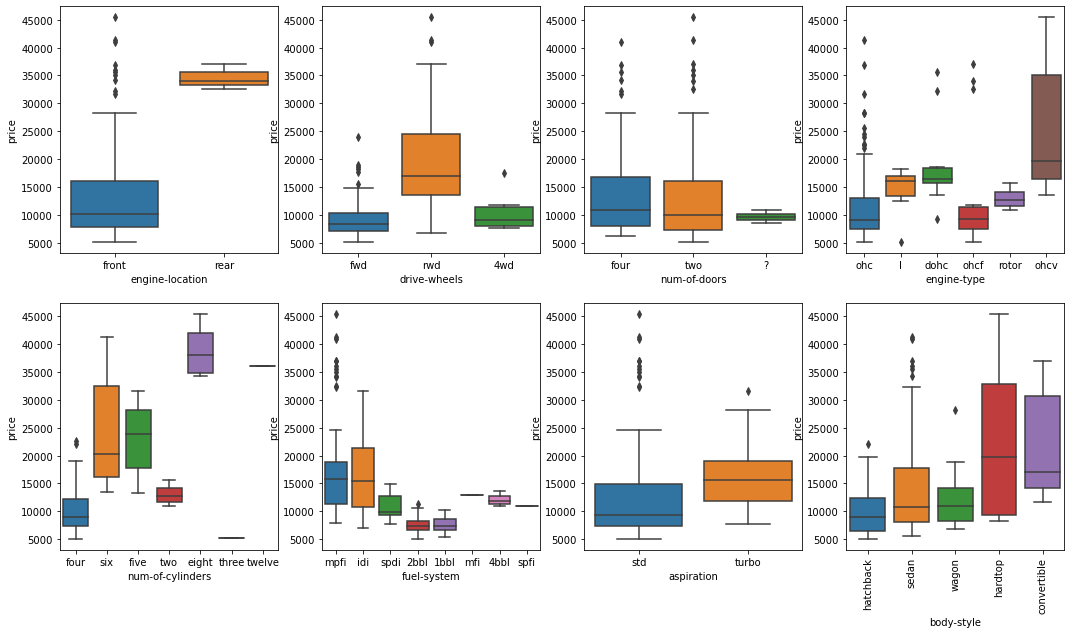

In [48]:
f,axes = plt.subplots(2,4,figsize=(18,10))
plt.xticks(rotation=90)
sns.boxplot(x=train_data['engine-location'],y=train_data['price'],ax=axes[0,0])
sns.boxplot(x=train_data['drive-wheels'],y=train_data['price'],ax=axes[0,1])
sns.boxplot(x=train_data['num-of-doors'],y=train_data['price'],ax=axes[0,2])
sns.boxplot(x=train_data['engine-type'],y=train_data['price'],ax=axes[0,3])
sns.boxplot(x=train_data['num-of-cylinders'],y=train_data['price'],ax=axes[1,0])
sns.boxplot(x=train_data['fuel-system'],y=train_data['price'],ax=axes[1,1])
sns.boxplot(x=train_data['aspiration'],y=train_data['price'],ax=axes[1,2])
sns.boxplot(x=train_data['body-style'],y=train_data['price'],ax=axes[1,3]);

#### Inference

#### Lets find out What is the distribution of the Engine type with the respect to Price

<AxesSubplot:xlabel='fuel-type', ylabel='price'>

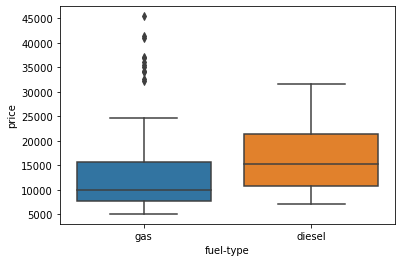

In [49]:
sns.boxplot(y=train_data['price'],x=train_data['fuel-type'])

#### Inference

In [50]:
train_data.columns

Index(['ID', 'symboling', 'normalized-losses', 'make', 'fuel-type',
       'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
       'engine-location', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size',
       'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

#### Lets find What is the coorelation of Price with Respect to other Variables

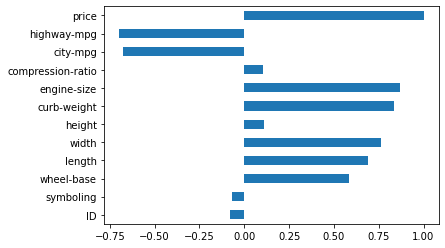

In [51]:
train_data.corr()['price'].plot(kind='barh');

### Bivariate Analysis

### Brand Category - Mileage

In [52]:
train_data = train_data.merge(train_comp_avg_price, on = 'make')

In [53]:
train_data['make_category'] = train_data['make_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

#### Inference

In [54]:
train_data['mileage'] = train_data['city-mpg']*0.55 + train_data['highway-mpg']*0.45

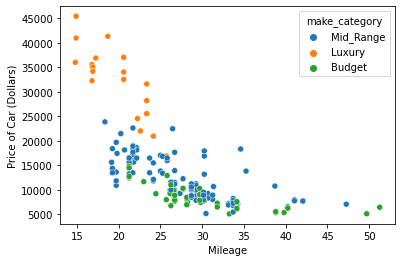

In [55]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'make_category', data = train_data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Make Category - Horsepower

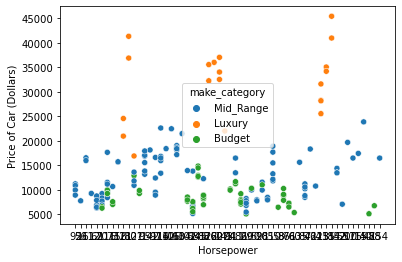

In [56]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'make_category', data = train_data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Mileage - Fuel Type

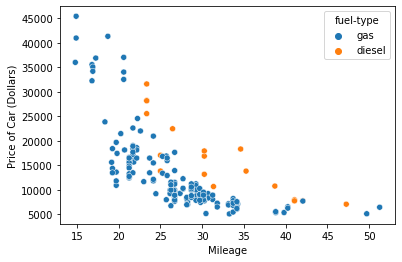

In [57]:
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fuel-type', data = train_data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Horsepower - Fuel Type

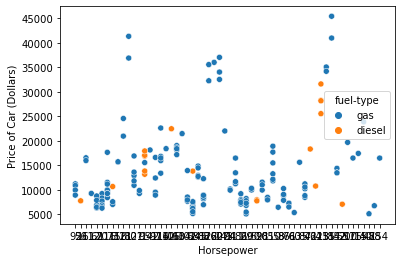

In [58]:
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fuel-type', data = train_data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

### Summary Univariate and Bivriate Analysis:

### Converting the Categorical Variables into Numerical Variable

In [59]:
train_data2 = train_data1.copy()

In [60]:
train_data2.drop(['ID'],axis=1, inplace=True) # Droping the ID

In [61]:
train_data2 = pd.get_dummies(train_data2,drop_first=True)

In [62]:
train_data2.isnull().sum().any()

False

### Dividing the Data in to X and Y variable

In [63]:
X = train_data2.drop('price',axis=1)
print(X.shape)

(181, 63)


In [64]:
y = train_data2['price']
print(y.shape)

(181,)


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

              feature          VIF
0           symboling     7.716481
1   normalized-losses     3.862617
2          wheel-base    24.973881
3              length    29.360059
4               width    16.569825
..                ...          ...
58    fuel-system_idi  2484.526962
59    fuel-system_mfi     2.463171
60   fuel-system_mpfi    38.368175
61   fuel-system_spdi    10.366131
62   fuel-system_spfi     3.217709

[63 rows x 2 columns]


### Since Most of the Data is normally distributed hence using the Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
SS = StandardScaler()

In [68]:
X[X.columns] = SS.fit_transform(X)

In [69]:
X.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,-1.464797,-1.772777,0.601828,0.115909,0.259957,0.076302,-0.203367,-0.138965,-0.110806,0.869079,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536
1,-0.673369,2.130485,0.405084,0.213451,-0.534370,0.236891,0.279354,0.850186,-0.110806,-0.276441,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536
2,-0.673369,0.000000,-0.431081,0.595489,0.259957,0.598217,0.028416,0.096547,0.462664,2.047329,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536
3,-0.673369,1.273671,1.503575,1.018169,1.147734,1.200428,1.212231,0.567571,1.380215,0.803621,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,3.009245,-0.074536,-0.900000,-0.228748,-0.074536
4,-2.256224,-0.566892,0.913341,1.188867,0.587032,0.999691,0.710355,0.308508,1.686065,-0.407358,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536


### Linear Regression Model Building

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
LR = LinearRegression()

In [72]:
LR.fit(X,y)

LinearRegression()

In [73]:
Pred_Values = LR.predict(X)

In [74]:
Pred_Values

array([10071.66063589, 23390.63255388,  9218.31992808, 16550.31107235,
       16245.05871446,  9166.87082386, 33814.48100543, 33426.13062438,
        9465.25294366,  9166.41980561,  7280.59219462,  9657.03393282,
       12029.02297128, 12230.62293137, 17932.70645903, 11633.10671043,
        7294.67163059, 29956.24588975,  8975.62972557,  4721.27046463,
       17954.49567933, 27927.81456049, 16763.82216394, 15645.        ,
        6758.55504857, 12927.82915317, 19003.8731908 ,  9123.79834384,
       15700.993539  , 35881.51120205,  7846.45823072,  8484.62337857,
        6007.7966273 , 18003.97589477, 16079.86100786,  8822.95603622,
       25249.57989865, 16503.        , 16042.05226489, 12964.        ,
        7094.64705509,  9740.5141871 , 15480.85362858,  8827.59390468,
       13871.64198303,  7182.24049786,  9530.85386679, 10273.3256749 ,
        6941.20943607, 35044.59683301, 10784.13883882, 16922.59681615,
       10940.50731232, 12133.5919075 , 12133.5919075 ,  6758.55504857,
      

In [75]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [76]:
mse = mean_squared_error(y,Pred_Values)

In [77]:
rmse = np.sqrt(mse)

In [78]:
rmse

1332.2612143127765

### Predicting the test model

In [79]:
test_data1 = test_data.copy()

In [80]:
test_data1.shape

(20, 26)

In [81]:
test_data1['normalized-losses']=test_data1['normalized-losses'].str.replace('?','NaN').astype('float')  

In [82]:
test_data1.fillna(test_data1['normalized-losses'].mean(), inplace=True)

In [83]:
test_data1 = pd.get_dummies(test_data1.drop(['ID'],axis=1), drop_first=True)

In [84]:
test_data1.shape

(20, 39)

In [85]:
missing_cols = set(X.columns) - set(test_data1.columns)

In [86]:
missing_cols

{'body-style_hardtop',
 'body-style_hatchback',
 'engine-location_rear',
 'engine-type_ohcf',
 'engine-type_ohcv',
 'engine-type_rotor',
 'fuel-system_4bbl',
 'fuel-system_mfi',
 'fuel-system_spdi',
 'fuel-system_spfi',
 'make_audi',
 'make_chevrolet',
 'make_dodge',
 'make_isuzu',
 'make_jaguar',
 'make_mercedes-benz',
 'make_mercury',
 'make_porsche',
 'make_renault',
 'make_subaru',
 'num-of-cylinders_five',
 'num-of-cylinders_three',
 'num-of-cylinders_twelve',
 'num-of-cylinders_two'}

In [87]:
for col in missing_cols:
    test_data1[col] = 0
    test_data1= test_data1[test_data1.columns]

In [88]:
test_data2 = test_data1[X.columns]

In [89]:
test_data2[test_data2.columns] = SS.transform(test_data2)

In [90]:
test_data2.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,-2.256224,-0.566892,0.913341,1.188867,0.587032,0.999691,0.666297,0.308508,1.686065,-0.407358,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536
1,-0.673369,2.130485,0.405084,0.213451,-0.534370,0.236891,0.384710,0.850186,-0.110806,-0.276441,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536
2,-1.464797,-1.487173,0.913341,1.188867,0.587032,1.521606,1.135609,0.049445,1.074364,-0.407358,...,-0.074536,-0.074536,-0.150329,-0.686691,-0.129823,-0.332309,-0.074536,1.111111,-0.228748,-0.074536
3,0.118058,1.051534,-0.824570,-0.558754,-1.001621,-1.168265,-1.101764,-0.892604,-1.410670,-0.145525,...,-0.074536,-0.074536,-0.150329,1.456259,-0.129823,-0.332309,-0.074536,-0.900000,-0.228748,-0.074536
4,0.118058,-0.566892,-0.693407,-0.323028,-1.001621,-0.084287,-1.009817,-0.727746,-0.722507,0.050850,...,-0.074536,-0.074536,-0.150329,1.456259,-0.129823,-0.332309,-0.074536,-0.900000,-0.228748,-0.074536


In [91]:
Idvalues = pd.DataFrame(test_data['ID'])

In [92]:
predvalues = pd.DataFrame(LR.predict(test_data2))

In [93]:
predvalues

,0
0,16196.352025
1,23665.338070
2,18494.032293
3,5338.791146
4,5999.251310
5,9800.993022
6,12666.244711
7,12478.811151
8,12196.438159
9,10138.085753


In [94]:
Idvalues['PredictedValues'] = predvalues

In [95]:
Idvalues.to_csv('submission.csv', index=False, header=False)